In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Own function for computing KNN with k=1

In [2]:
def my_knn(X_train, y_train, X_test):
  y_pred = np.array([[]])
  for te_obs in X_test:
    min_dist=1e20
    for i, (tr_obs, tr_class) in enumerate(zip(X_train, y_train)):
      dist = np.sqrt(((te_obs-tr_obs)**2).sum(axis=0))
      if dist < min_dist:
        min_dist = dist
        min_obs = tr_obs
        min_class = tr_class
        min_i = i
    y_pred = np.append(y_pred, min_class)
  return y_pred

In [3]:
people = fetch_lfw_people(min_faces_per_person = 20, resize=0.7)

In [4]:
image_shape = people.images[0].shape
image_shape

(87, 65)

In [ ]:
people.target_names

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image, cmap=cm.gray)
  ax.set_title(people.target_names[target])

In [7]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [ ]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end=' ')
  if (i+1)%3 ==0:
    print()

In [9]:
people.data.shape

(3023, 5655)

In [10]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


Calculates the mean and standard deviation of the dataset

In [12]:
X_people_mean = np.mean(X_people, axis=0)
X_people_std = np.std(X_people, axis=0, ddof=1)

Standardizes dataset

In [13]:
X_people = (X_people - X_people_mean)/X_people_std

Running our own KNN with k=1 function. X_train used is computed in the chunk above. For consistency, we will use unstandardized data to compute our own KNN, like the X_train used for the above KNN computation.

In [14]:
y_pred = my_knn(X_train, y_train, X_test)

In [15]:
accuracy_score(y_pred, y_test)

0.23255813953488372

Same results, validates our function.

Computes covariance matrix

In [16]:
cov_matrix_2 = (X_people.T @ X_people) / (X_people.shape[0]-1)
cov_matrix_2

array([[ 0.99999845,  0.97928625,  0.92844844, ..., -0.00927771,
        -0.01618169, -0.01485765],
       [ 0.97928625,  1.0000006 ,  0.978086  , ..., -0.0118098 ,
        -0.0187887 , -0.0190735 ],
       [ 0.92844844,  0.978086  ,  0.9999994 , ..., -0.01986225,
        -0.02924158, -0.03269945],
       ...,
       [-0.00927771, -0.0118098 , -0.01986225, ...,  1.0000007 ,
         0.9624569 ,  0.882829  ],
       [-0.01618169, -0.0187887 , -0.02924158, ...,  0.9624569 ,
         1.000001  ,  0.96808505],
       [-0.01485765, -0.0190735 , -0.03269945, ...,  0.882829  ,
         0.96808505,  0.9999982 ]], dtype=float32)

Computes eigenvalues and eigenvectors of covariance matrix

In [17]:
val_2, vec_2 = np.linalg.eig(cov_matrix_2)
print(val_2)
print(vec_2)

[ 1.5084062e+03  6.2152826e+02  4.2481931e+02 ... -5.5625094e-08
 -5.9811057e-08 -3.5820523e-08]
[[-1.98759604e-03 -8.57915729e-03 -1.92161370e-02 ...  1.15194160e-03
  -5.31899510e-04  4.01710849e-06]
 [-2.36864504e-03 -8.49713665e-03 -2.01088190e-02 ...  7.60699296e-03
  -1.02591086e-02 -2.04272121e-02]
 [-2.73777405e-03 -8.79432540e-03 -2.12171208e-02 ... -1.76796280e-02
  -4.09280695e-03  1.33060208e-02]
 ...
 [-1.78924261e-03  1.06049571e-02  2.77084624e-03 ...  6.08807756e-03
   1.55317243e-02 -2.07685865e-03]
 [-1.58617378e-03  1.03026321e-02  2.97565665e-03 ...  5.60984947e-03
  -9.05180722e-03 -1.38741164e-02]
 [-1.23330369e-03  9.85190272e-03  3.13045224e-03 ... -1.05762975e-02
   1.19304359e-02  4.20962507e-03]]


Simultaneously sorts largest eigenvalues and the corresponding eigenvectors

In [18]:
index = val_2.argsort()[::-1]
eigval_2 = val_2[index]
eigvec_2 = vec_2[:,index]

In [19]:
eigval_2

array([ 1.5084062e+03,  6.2152826e+02,  4.2481931e+02, ...,
       -4.6053469e-06, -4.6280579e-06, -4.6477403e-06], dtype=float32)

In [20]:
eigvec_2

array([[-0.0019876 , -0.00857916, -0.01921614, ...,  0.00069185,
         0.00162982, -0.00124249],
       [-0.00236865, -0.00849714, -0.02010882, ..., -0.00037242,
        -0.00114094, -0.00532908],
       [-0.00273777, -0.00879433, -0.02121712, ..., -0.00260353,
        -0.00632396,  0.00766554],
       ...,
       [-0.00178924,  0.01060496,  0.00277085, ...,  0.00745533,
        -0.00106318, -0.00184463],
       [-0.00158617,  0.01030263,  0.00297566, ...,  0.00446471,
        -0.00453406,  0.00120215],
       [-0.0012333 ,  0.0098519 ,  0.00313045, ..., -0.00387705,
        -0.00371409,  0.00503087]], dtype=float32)

Takes the eigenvectors corresponding to the largest 100 eigenvalues

In [21]:
new_base_100 = eigvec_2[:,:100]
new_base_100.shape

(5655, 100)

Projects the data on the reduced dimensions

In [22]:
new_X_people_100 = X_people @ new_base_100

In [23]:
new_X_people_100.shape

(2063, 100)

In [24]:
new_X_people_100

array([[-22.486244  , -22.455296  ,  -3.091397  , ...,   1.2018657 ,
         -0.23465464,  -1.5919192 ],
       [ -5.462109  , -39.963055  ,  -9.760394  , ...,   1.3057508 ,
         -4.283178  ,   0.8914396 ],
       [ 61.883575  ,  19.203999  , -24.429802  , ...,  -4.1177764 ,
         -3.9368954 ,   0.90973496],
       ...,
       [-41.428833  ,  -6.509574  , -10.0286    , ...,   0.36442375,
          1.0276735 ,  -0.7881756 ],
       [-48.933647  ,  70.13073   ,  21.267193  , ...,  -5.0046244 ,
          3.2665043 ,  -1.4391997 ],
       [-76.09096   , -37.856945  ,   2.1241548 , ...,   3.5849214 ,
         -2.8762493 ,  -0.47657728]], dtype=float32)

Computes scikit learn PCA to verify own results. Also saves projected values.

In [25]:
pca_100 = PCA(n_components=100)
new_data_pca_100 = pca_100.fit_transform(X_people)

In [26]:
eigvec_2[:,:100]

array([[-0.0019876 , -0.00857916, -0.01921614, ..., -0.00442393,
         0.00819862, -0.03089322],
       [-0.00236865, -0.00849714, -0.02010882, ..., -0.00643351,
         0.00508224, -0.03370292],
       [-0.00273777, -0.00879433, -0.02121712, ..., -0.00771954,
         0.00392402, -0.03136019],
       ...,
       [-0.00178924,  0.01060496,  0.00277085, ..., -0.00221162,
        -0.0011222 , -0.00813787],
       [-0.00158617,  0.01030263,  0.00297566, ..., -0.01051723,
         0.00383753, -0.00397913],
       [-0.0012333 ,  0.0098519 ,  0.00313045, ..., -0.01399695,
         0.00844866,  0.00098401]], dtype=float32)

In [27]:
pca_100.components_.T

array([[-0.00198761,  0.00857915, -0.01921626, ...,  0.00517145,
        -0.03241887,  0.00572277],
       [-0.00236865,  0.00849709, -0.02010886, ...,  0.00227663,
        -0.03478203,  0.00400741],
       [-0.00273778,  0.00879433, -0.02121717, ...,  0.00101938,
        -0.03202958,  0.00357717],
       ...,
       [-0.00178924, -0.01060496,  0.00277085, ...,  0.00015534,
        -0.00504422, -0.00602932],
       [-0.00158617, -0.01030263,  0.00297566, ..., -0.00395745,
        -0.00444496,  0.00201299],
       [-0.0012333 , -0.0098519 ,  0.00313045, ..., -0.0043028 ,
        -0.00178935,  0.008076  ]], dtype=float32)

Results are close enough to validate our results.

Splits the data into training and testing sets

In [28]:
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(new_X_people_100, y_people, stratify=y_people, random_state=0)

Computes the KNN accuracy score for reduced 100D data

In [29]:
y_pred_100 = my_knn(X_train_100, y_train_100, X_test_100)
accuracy_score(y_pred_100, y_test_100)

0.25775193798449614

Checks against scikit learn KNN.

In [30]:
knn_100 = KNeighborsClassifier(n_neighbors=1)
knn_100.fit(X_train_100, y_train_100)
knn_100.score(X_test_100, y_test_100)

0.25775193798449614

Our results are validated.

In [31]:
weigval_2 = eigval_2[:100]
weigvec_2 = eigvec_2[:,:100]

Creates eigenvalue diagonal matrix for Whitening

In [32]:
eig_diag = np.diag((weigval_2)**(-1/2))
eig_diag

array([[0.02574784, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04011156, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04851744, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.43766454, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.43976012,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.44205007]], dtype=float32)

Whitens the data

In [33]:
wX_people_100 = (eig_diag @ weigvec_2.T @ X_people.T).T

Splits whitened data into training and testing sets

In [34]:
wX_train_100, wX_test_100, wy_train_100, wy_test_100 = train_test_split(wX_people_100, y_people, stratify=y_people, random_state=0)

Computes KNN accuracy for whitened data

In [35]:
wy_pred_100 = my_knn(wX_train_100, wy_train_100, wX_test_100)
accuracy_score(wy_pred_100, wy_test_100)

0.3546511627906977

Checks against scikit learn KNN

In [36]:
knn_100w = KNeighborsClassifier(n_neighbors=1)
knn_100w.fit(wX_train_100, wy_train_100)
knn_100w.score(wX_test_100, wy_test_100)

0.3546511627906977

Computes new base with eigenvectors corresponding to the 2 largest eigenvalues

In [37]:
new_base_2 = eigvec_2[:,:2]

Projects data on reduced 2D

In [38]:
new_X_people_2 = X_people @ new_base_2
new_X_people_2.shape

(2063, 2)

In [39]:
new_X_people_2

array([[-22.486246 , -22.455297 ],
       [ -5.4621067, -39.96306  ],
       [ 61.88358  ,  19.203997 ],
       ...,
       [-41.428833 ,  -6.509574 ],
       [-48.933647 ,  70.13073  ],
       [-76.09096  , -37.856945 ]], dtype=float32)

Computes scikit learn PCA for comparison

In [40]:
pca_2 = PCA(n_components=2)
new_data_pca_2 = pca_2.fit_transform(X_people)

In [41]:
new_data_pca_2

array([[-22.486254 ,  22.455284 ],
       [ -5.4621415,  39.963028 ],
       [ 61.883602 , -19.203976 ],
       ...,
       [-41.42885  ,   6.5095634],
       [-48.9336   , -70.13072  ],
       [-76.09099  ,  37.856915 ]], dtype=float32)

Plots our data

<function matplotlib.pyplot.show(*args, **kw)>

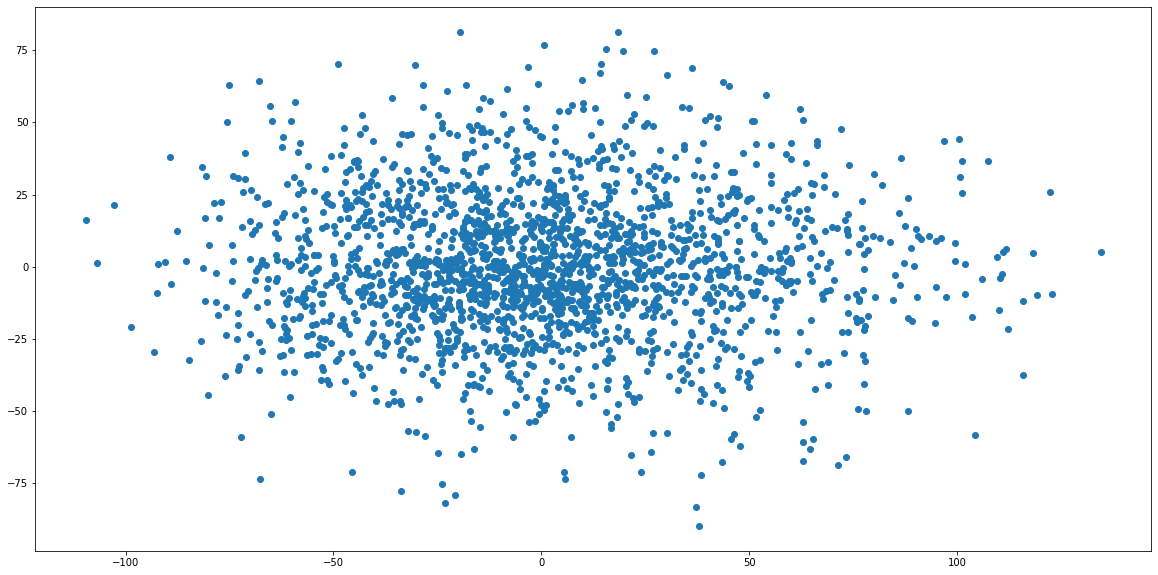

In [42]:
plt.figure(figsize=(20, 10))
plt.scatter(new_X_people_2[:,0],new_X_people_2[:,1])
plt.show

Plots scikit learn PCA data

<function matplotlib.pyplot.show(*args, **kw)>

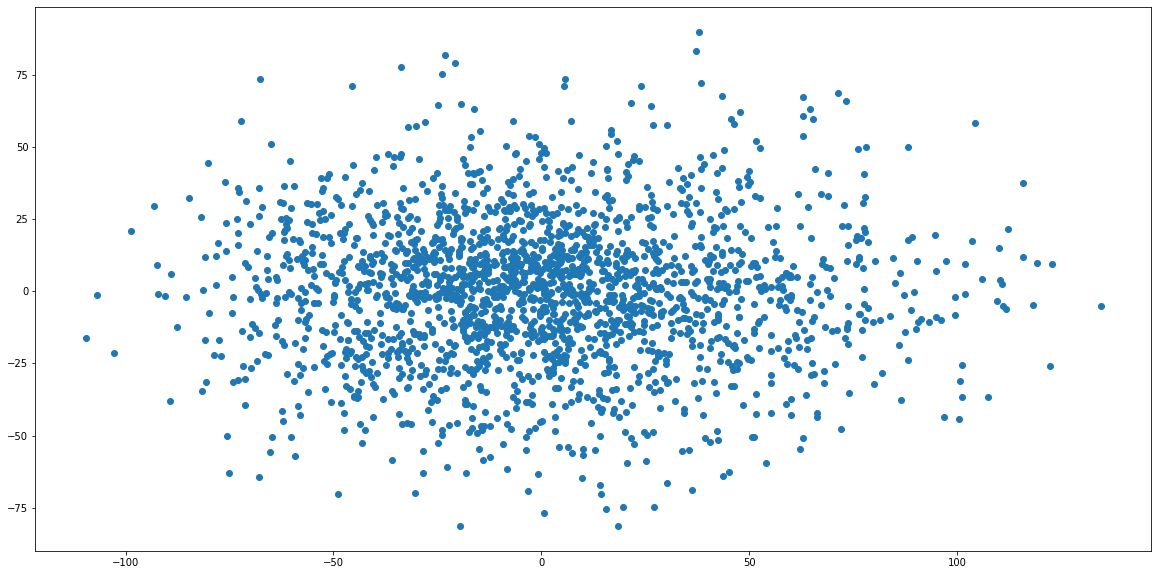

In [43]:
plt.figure(figsize=(20, 10))
plt.scatter(new_data_pca_2[:,0],new_data_pca_2[:,1])
plt.show